In [35]:
%pip install scikit-learn matplotlib numpy pandas pydotplus ipython graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0)
X = [[1,2,3], 
    [11,12,13]]
y = [0, 1]
classifier.fit(X, y)

RandomForestClassifier(random_state=0)

In [8]:
classifier.predict([[3,4,5],[1,2,3]])


array([0, 0])

In [10]:
from sklearn.preprocessing import StandardScaler

StandardScaler().fit(X).transform(X)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe.fit(X_train, y_train)
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
param_distributions = {
    "n_estimators": randint(1, 5),
    "max_depth": randint(5, 10)
}

search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
    n_iter=5,
    param_distributions=param_distributions,
    random_state=0
)
search.fit(X_train, y_train)
search.best_params_

search.score(X_test, y_test)

0.735363411343253

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df = pd.DataFrame({
    "buy": [True,True,True,True,True,True,True,False,False,False,False,False,False],
    "high": [4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
    "size": [30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
    "autolock": [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
})

X = df[["high", "size", "autolock"]]
y = df["buy"]
print(X)
print(y)

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

    high  size  autolock
0      4    30         1
1      5    45         0
2      3    32         1
3      1    20         1
4      6    35         1
5      3    40         1
6      4    38         1
7      1    20         0
8      2    18         0
9      1    20         0
10     1    22         0
11     1    24         1
12     3    25         0
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
Name: buy, dtype: bool


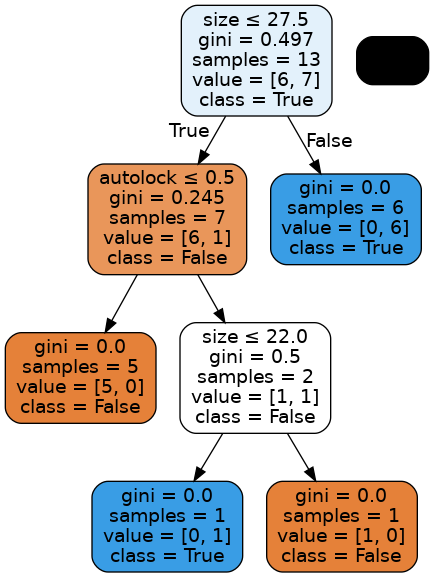

In [40]:
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
    feature_names=["high", "size", "autolock"],
    class_names=["False", "True"],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
